In [92]:
import mdptoolbox.mdp as mdp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
# El siguiente código lee el goal y el mapa del fichero

def lee_mapa(fichero):
    with open(fichero,'r') as archivo:
        lineas = archivo.readlines()
    numeros = [float(numero) for numero in lineas[0].split()]
    lineas.pop(0)
    lineas.reverse()
    matriz = []
    for linea in lineas:
        fila = [int(caracter) for caracter in linea.strip()]
        matriz.append(fila)
    return np.array(matriz),(numeros[0],numeros[1])

In [94]:
def visualiza_mapa(mapa,destino):
    plt.figure(figsize=(len(mapa[0]), len(mapa)))
    plt.imshow(1-mapa, cmap='gray', interpolation='none')
    plt.xlim(-0.5, len(mapa[0]) - 0.5) # vemos que se puede omitir
    plt.ylim(-0.5, len(mapa) - 0.5) # vemos que se puede omitir
    plt.gca().add_patch(plt.Rectangle((destino[0] - 0.5, destino[1] - 0.5), 1, 1, edgecolor='black', facecolor='red', lw=5))

In [95]:
def genera_estados(mapa):
    estados = []
    for i in range(0,mapa.shape[1]):
        for j in range(0,mapa.shape[0]):
            estados.append(tuple([i,j]))
    return estados

In [96]:
def es_obstaculo(estado,mapa):
    return mapa[estado[1],estado[0]] == 1

In [97]:
acciones = ['esperar','N','NE','E','SE','S','SO','O','NO']

In [98]:
def aplica_accion(estado,accion,mapa):
    if es_obstaculo(estado,mapa):
        return estado
    x = estado[0]
    y = estado[1]
    
    if accion == 'N':
        y += 1
    elif accion == 'S':
        y -= 1
    elif accion == 'E':
        x += 1
    elif accion == 'O':
        x -= 1
    elif accion == 'NE':
        y += 1
        x += 1
    elif accion == 'SE':
        y -= 1
        x += 1
    elif accion == 'SO':
        y -= 1
        x -= 1
    elif accion == 'NO':
        y += 1
        x -= 1
    return x,y

In [99]:
def obtiene_posibles_errores(accion):
    if accion=='N':
        errores = ['NE','NO']
    elif accion=='S':
        errores = ['SE','SO']
    elif accion=='E':
        errores = ['NE','SE']
    elif accion=='O':
        errores = ['NO', 'SO']
    elif accion=='NE':
        errores = ['N','E']
    elif accion=='NO':
        errores = ['N','O']
    elif accion=='SE':
        errores = ['S','E']
    elif accion == 'SO':
        errores = ['S','O']
    else:
        errores = []
    return errores

In [100]:
K = 1000
def obtiene_recompensa(estado,destino,mapa):
    if es_obstaculo(estado,mapa):
        valor = -K
    else:
        valor = - np.sqrt((estado[0]-destino[0])**2 + (estado[1]-destino[1])**2)
    return valor

In [101]:
def visualiza_recompensas(estados,destino,mapa):
    visualiza_mapa(mapa,destino)
    recompensas = [obtiene_recompensa(estado,destino,mapa) for estado in estados]
    recompensas = [np.nan if elemento == -1000 else elemento for elemento in recompensas] # para que no pinte los obstaculos
    max_recompensa = np.nanmax(recompensas)
    min_recompensa = np.nanmin(recompensas)
    for e in estados:
        r = obtiene_recompensa(e,destino,mapa)
        if r == -1000:
            continue
        a = (r-min_recompensa)/(max_recompensa-min_recompensa)
        rect = plt.Rectangle((e[0] - 0.5, e[1] - 0.5),1,1, alpha = a, linewidth=1, edgecolor='black', facecolor='green')
        plt.gca().add_patch(rect)
        plt.gca().add_patch(plt.Rectangle((destino[0] - 0.5, destino[1] - 0.5), 1, 1, edgecolor='black', facecolor='red', lw=5))

In [102]:
def crea_recompensas_sistema(estados,destino,mapa,acciones):
    matriz = []
    for e in estados:
        r = obtiene_recompensa(e,destino,mapa)
        fila = [r]*len(acciones)
        if e != destino:
            fila[0]=-100
        matriz.append(fila)
    return np.array(matriz)

In [103]:
def visualiza_politica(politica,mapa,destino,estados):
    visualiza_mapa(mapa,destino)
    for p in zip(estados,politica):
        accion = p[1]
        if accion=='esperar':
            continue
        estado = p[0]
        e1 = aplica_accion(estado,accion,mapa)
        x0 = estado[0]
        y0 = estado[1]
        x1 = e1[0]
        y1 = e1[1]
        
        plt.gca().arrow(x0, y0, (x1 - x0)*0.6, (y1 - y0)*0.6,
         head_width=0.3, head_length=0.3, fc='black', ec='black')

In [65]:
mapa,destino = lee_mapa("../data/map1.txt")

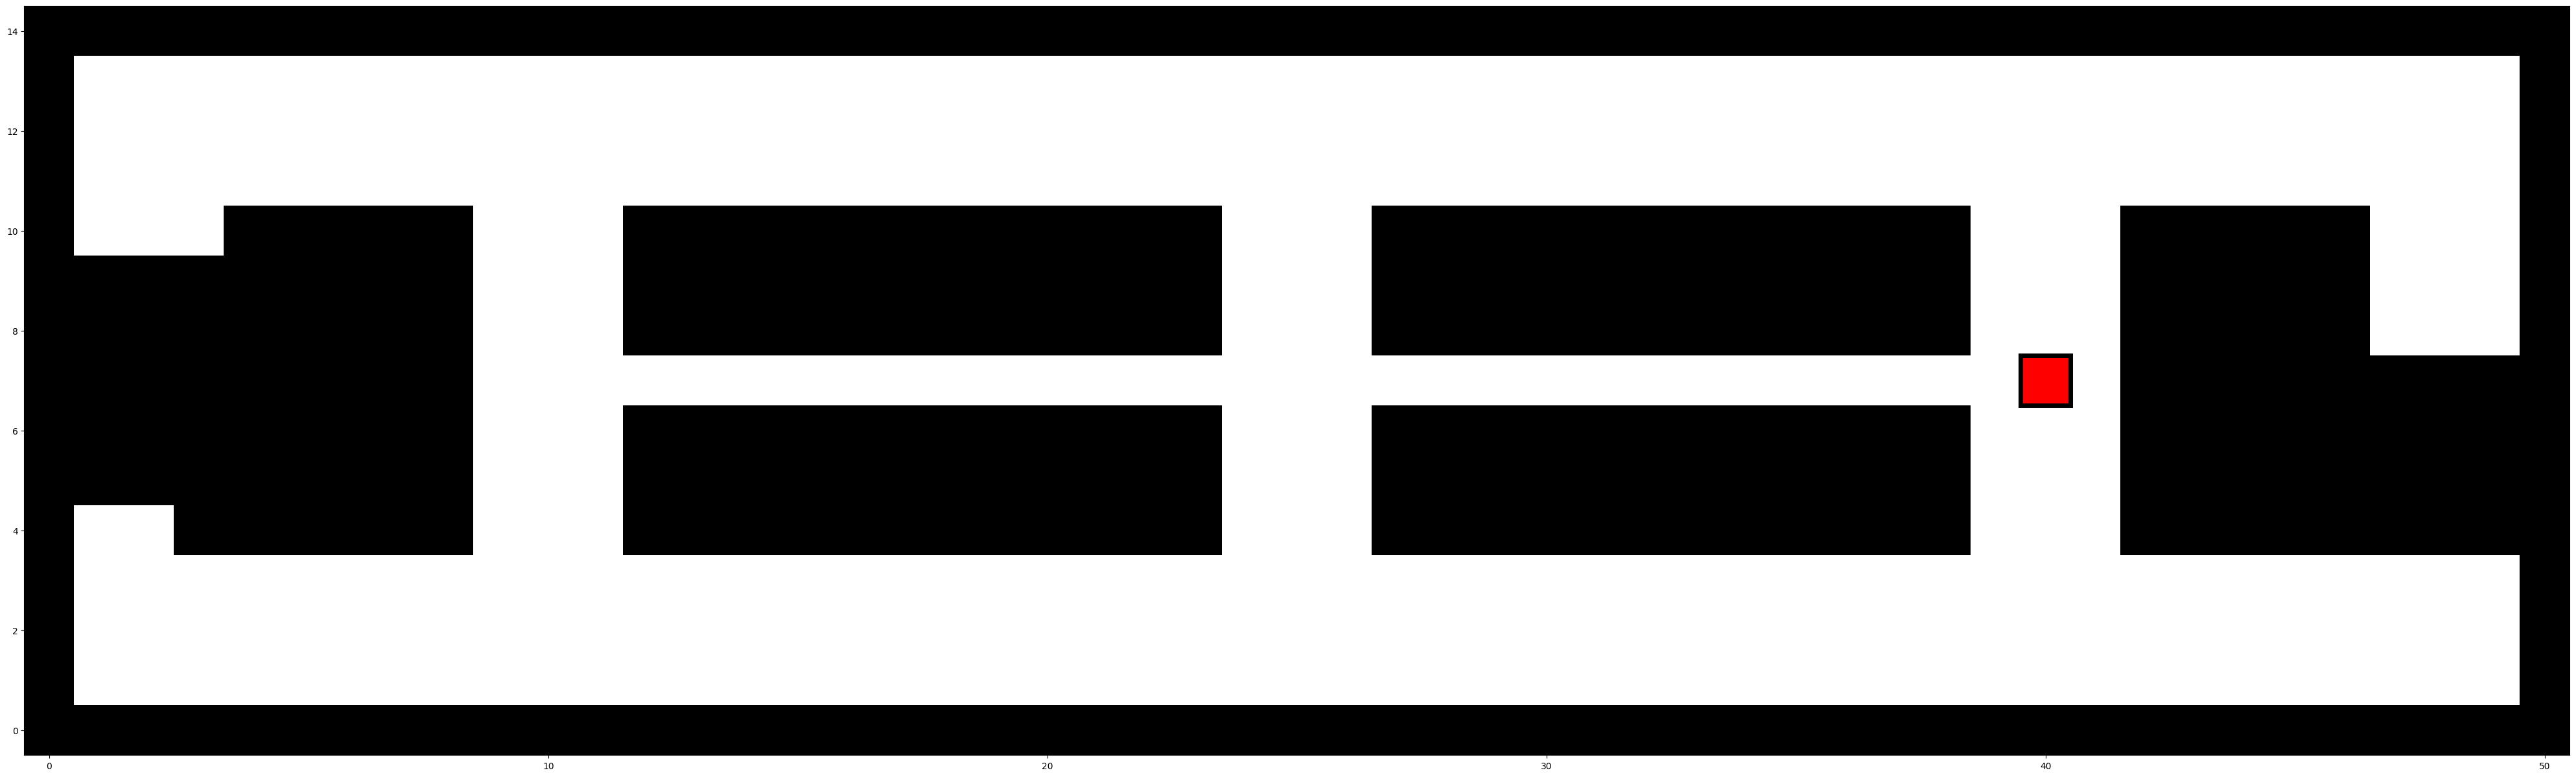

In [66]:
visualiza_mapa(mapa,destino)

In [67]:
estados = genera_estados(mapa)


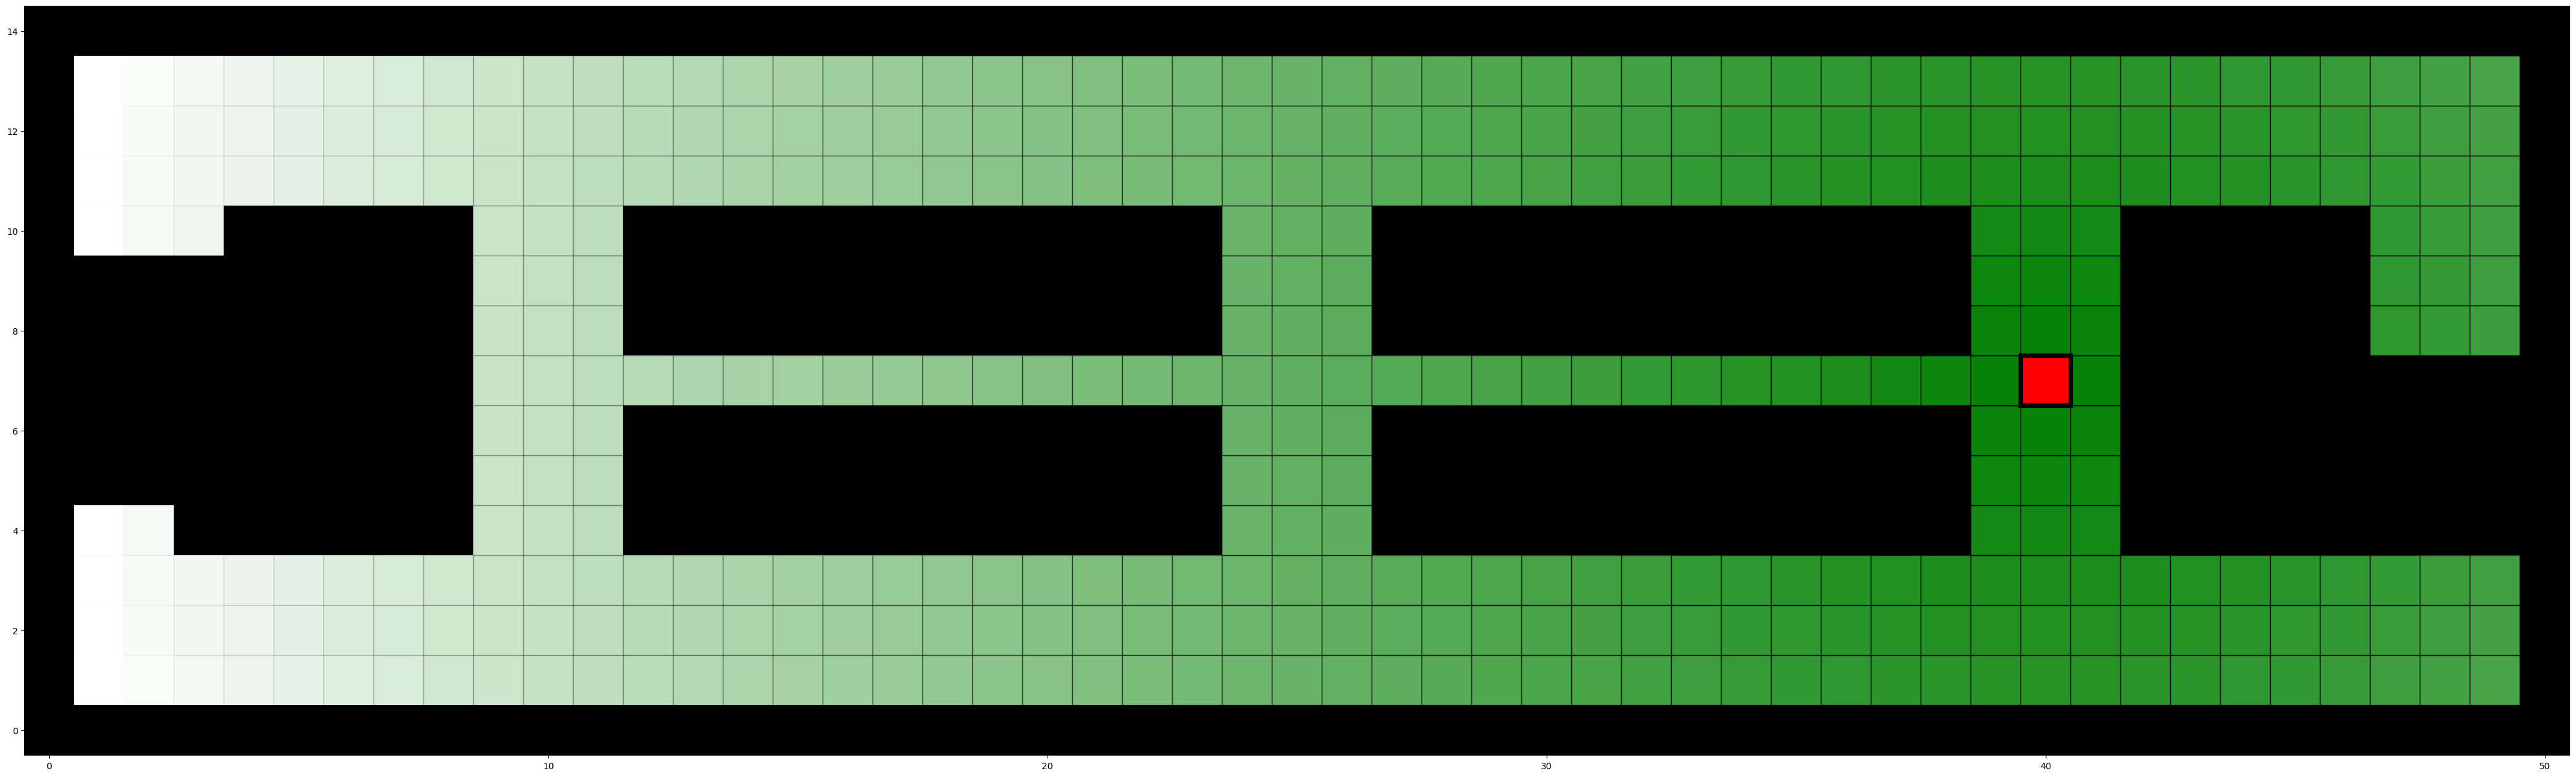

In [68]:
visualiza_recompensas(estados,destino,mapa)

In [69]:
nav_recompensas_sistema = crea_recompensas_sistema(estados,destino,mapa,acciones)

# ahora hacemos algo auxiliar para ver las recompensas
df = pd.DataFrame(nav_recompensas_sistema, columns=acciones, index=estados)

df

,esperar,N,NE,E,SE,S,SO,O,NO
"(0, 0)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(0, 1)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(0, 2)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(0, 3)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(0, 4)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...
"(50, 10)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(50, 11)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(50, 12)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
"(50, 13)",-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


In [70]:
def obtiene_indice_estado(estado):
    return int(estado[0]*mapa.shape[0]+estado[1])


print(obtiene_indice_estado((40,7)))

print(nav_recompensas_sistema[607])

607
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]


In [71]:
# ahora podemos hacer la matriz de transición SXS 
def crea_transiciones_movimiento(accion, prob_error,estados,mapa):
    matriz = []
    for e0 in estados:
        fila = [0]*len(estados)
        if es_obstaculo(e0,mapa):
            fila[obtiene_indice_estado(e0)]=1
        else:
            goal = aplica_accion(e0,accion,mapa)
            errores = obtiene_posibles_errores(accion)
            if len(errores)==0:
                fila[obtiene_indice_estado(goal)] = 1
            else:
                fila[obtiene_indice_estado(goal)] = 1 - prob_error
                for error in errores:
                    goal_error = aplica_accion(e0,error,mapa)
                    fila[obtiene_indice_estado(goal_error)] = prob_error/len(errores)
        matriz.append(fila)
    return np.array(matriz)

In [72]:
test = crea_transiciones_movimiento('N',0.2,estados,mapa)
print(test[0,0])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((10,8))])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((9,8))])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((11,8))])

1.0
0.8
0.1
0.1


In [73]:
## TODAS LAS TRANSICIONES DEL SISTEMA

def crea_transiciones_sistema(prob_error,estados,mapa):
    return np.array([crea_transiciones_movimiento('esperar',prob_error,estados,mapa), 
                     crea_transiciones_movimiento('N',prob_error,estados,mapa),
                     crea_transiciones_movimiento('NE',prob_error,estados,mapa),
                     crea_transiciones_movimiento('E',prob_error,estados,mapa),
                     crea_transiciones_movimiento('SE',prob_error,estados,mapa),
                     crea_transiciones_movimiento('S',prob_error,estados,mapa),
                     crea_transiciones_movimiento('SO',prob_error,estados,mapa),
                     crea_transiciones_movimiento('O',prob_error,estados,mapa),
                     crea_transiciones_movimiento('NO',prob_error,estados,mapa)])

In [74]:
nav_transiciones_sistema = crea_transiciones_sistema(0.2,estados,mapa)

transiciones_esperar = nav_transiciones_sistema[0].shape

df_transiciones_norte = pd.DataFrame(nav_transiciones_sistema[1], columns=estados, index=estados)


def compute_transition(transiciones):
    return tuple(transiciones[a] for a in range(len(acciones)))



Q = { s: {a: 0.0 for a in range(len(acciones))} for s in range(len(estados))}

print(Q)

nav_transiciones_sistema.shape[1]


{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 2: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 3: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 4: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 5: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 6: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 7: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 8: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 9: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 10: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 11: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, 12: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0

765

In [75]:
matriz_accion_elegida = nav_transiciones_sistema[1]

probabilidades_estado_34 = matriz_accion_elegida[34]

np.random.choice(range(nav_transiciones_sistema.shape[1]), p=probabilidades_estado_34)

35

In [76]:
indices_nav_acciones = {'esperar': 0, 'N': 1, 'NE': 2, 'E': 3, 'SE': 4, 'S': 5, 'SO': 6, 'O': 7, 'NO': 8}

In [24]:
ejemplo_q_learning_nav_robot = mdp.QLearning(
    transitions=nav_transiciones_sistema,
    reward=nav_recompensas_sistema,
    discount=0.9,
    n_iter=1000000
)

ejemplo_q_learning_nav_robot.run()

KeyboardInterrupt: 

In [77]:
def crea_politica_greedy(estados,acciones,mapa,destino):
    p = []
    for e in estados:
        valores = []
        for a in acciones:
            e1 = aplica_accion(e,a,mapa)
            valores.append(obtiene_recompensa(e1,destino,mapa))
        accion = acciones[np.argmax(valores)]
        p.append(accion)
    return p

In [91]:
politica_greedy = crea_politica_greedy(estados,acciones,mapa,destino)

politica_greedy


politica_greedy_indices = [indices_nav_acciones[a] for a in politica_greedy]

politica = enumerate(politica_greedy_indices) # por que no funciona

politica_final = [(i, a) for i,a in politica]

politica_final = dict(politica_final)

politica_final





{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 3,
 26: 4,
 27: 4,
 28: 4,
 29: 0,
 30: 0,
 31: 2,
 32: 2,
 33: 3,
 34: 4,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 3,
 41: 4,
 42: 4,
 43: 4,
 44: 0,
 45: 0,
 46: 2,
 47: 2,
 48: 3,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 2,
 56: 3,
 57: 4,
 58: 4,
 59: 0,
 60: 0,
 61: 2,
 62: 2,
 63: 3,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 3,
 72: 4,
 73: 4,
 74: 0,
 75: 0,
 76: 2,
 77: 2,
 78: 3,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 3,
 87: 4,
 88: 4,
 89: 0,
 90: 0,
 91: 2,
 92: 2,
 93: 3,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 3,
 102: 4,
 103: 4,
 104: 0,
 105: 0,
 106: 2,
 107: 2,
 108: 3,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 3,
 117: 4,
 118: 4,
 119: 0,
 120: 0,
 121: 2,
 122: 2,
 12

In [87]:
politica_por_defecto = np.array([indices_nav_acciones[x] for x in politica_greedy])
ejemplo_nav_robot_policy_iteration = mdp.PolicyIteration(
    transitions=nav_transiciones_sistema,
    reward=nav_recompensas_sistema,
    discount=0.9,
    policy0=politica_por_defecto
)
ejemplo_nav_robot_policy_iteration.setVerbose()
ejemplo_nav_robot_policy_iteration.run()

  Iteration		Number of different actions


    1		  247
    2		  156
    3		  59
    4		  8
    5		  3
    6		  1
    7		  0
Iterating stopped, unchanging policy found.


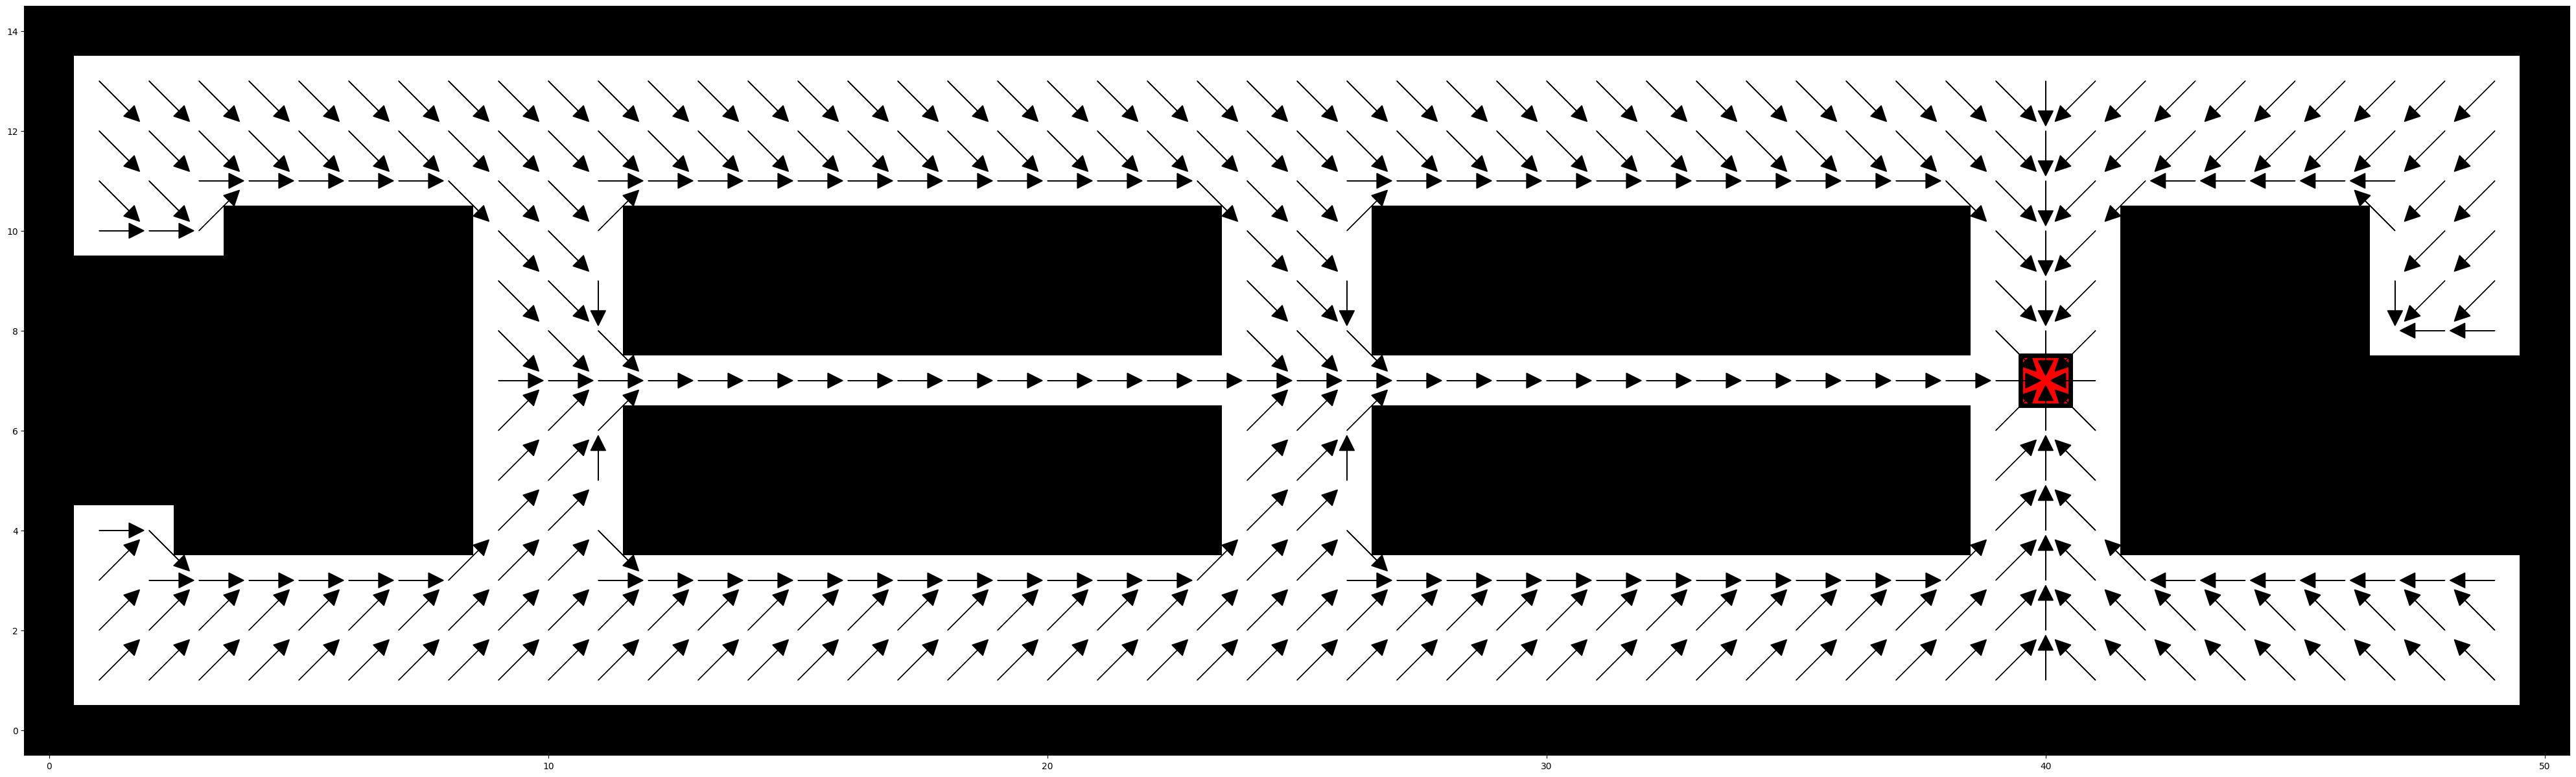

In [28]:
visualiza_politica(politica_greedy,mapa,destino,estados)

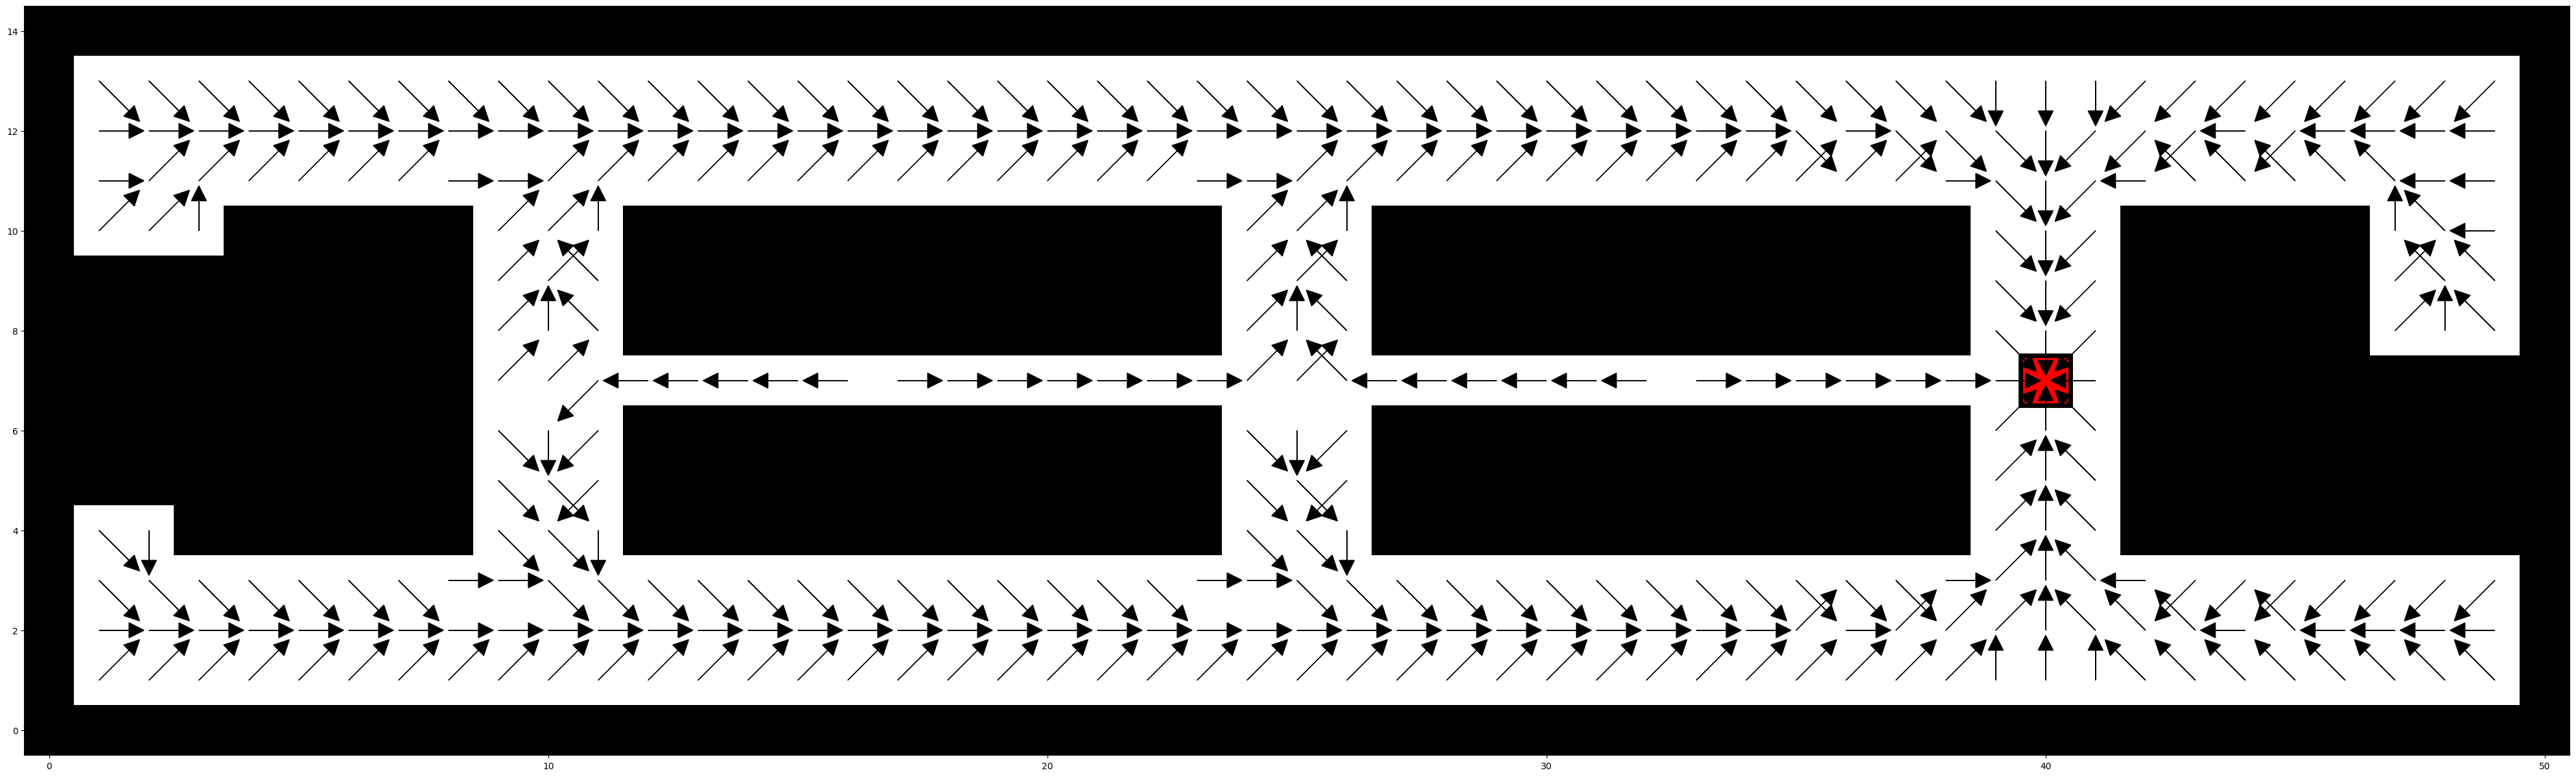

In [29]:
politica_policy_iteration = [acciones[i] for i in ejemplo_nav_robot_policy_iteration.policy]
visualiza_politica(politica_policy_iteration,mapa,destino,estados)

In [30]:
politica_q_learning = [acciones[i] for i in ejemplo_q_learning_nav_robot.policy]
visualiza_politica(politica_q_learning,mapa,destino,estados)

NameError: name 'ejemplo_q_learning_nav_robot' is not defined

In [31]:
print("Size of nav_transiciones_sistema:", np.shape(nav_transiciones_sistema))
print("Size of nav_recompensas_sistema:", np.shape(nav_recompensas_sistema))

Size of nav_transiciones_sistema: (9, 765, 765)
Size of nav_recompensas_sistema: (765, 9)


In [52]:
import Montecarlo as mc

modelo_montecarlo = mc.MonteCarlo(
    nav_transiciones_sistema,
    nav_recompensas_sistema
)

modelo_montecarlo.entrenar()


politica = modelo_montecarlo.obtener_politica()

politica_greedy



NameError: name 'politica_greedy' is not defined

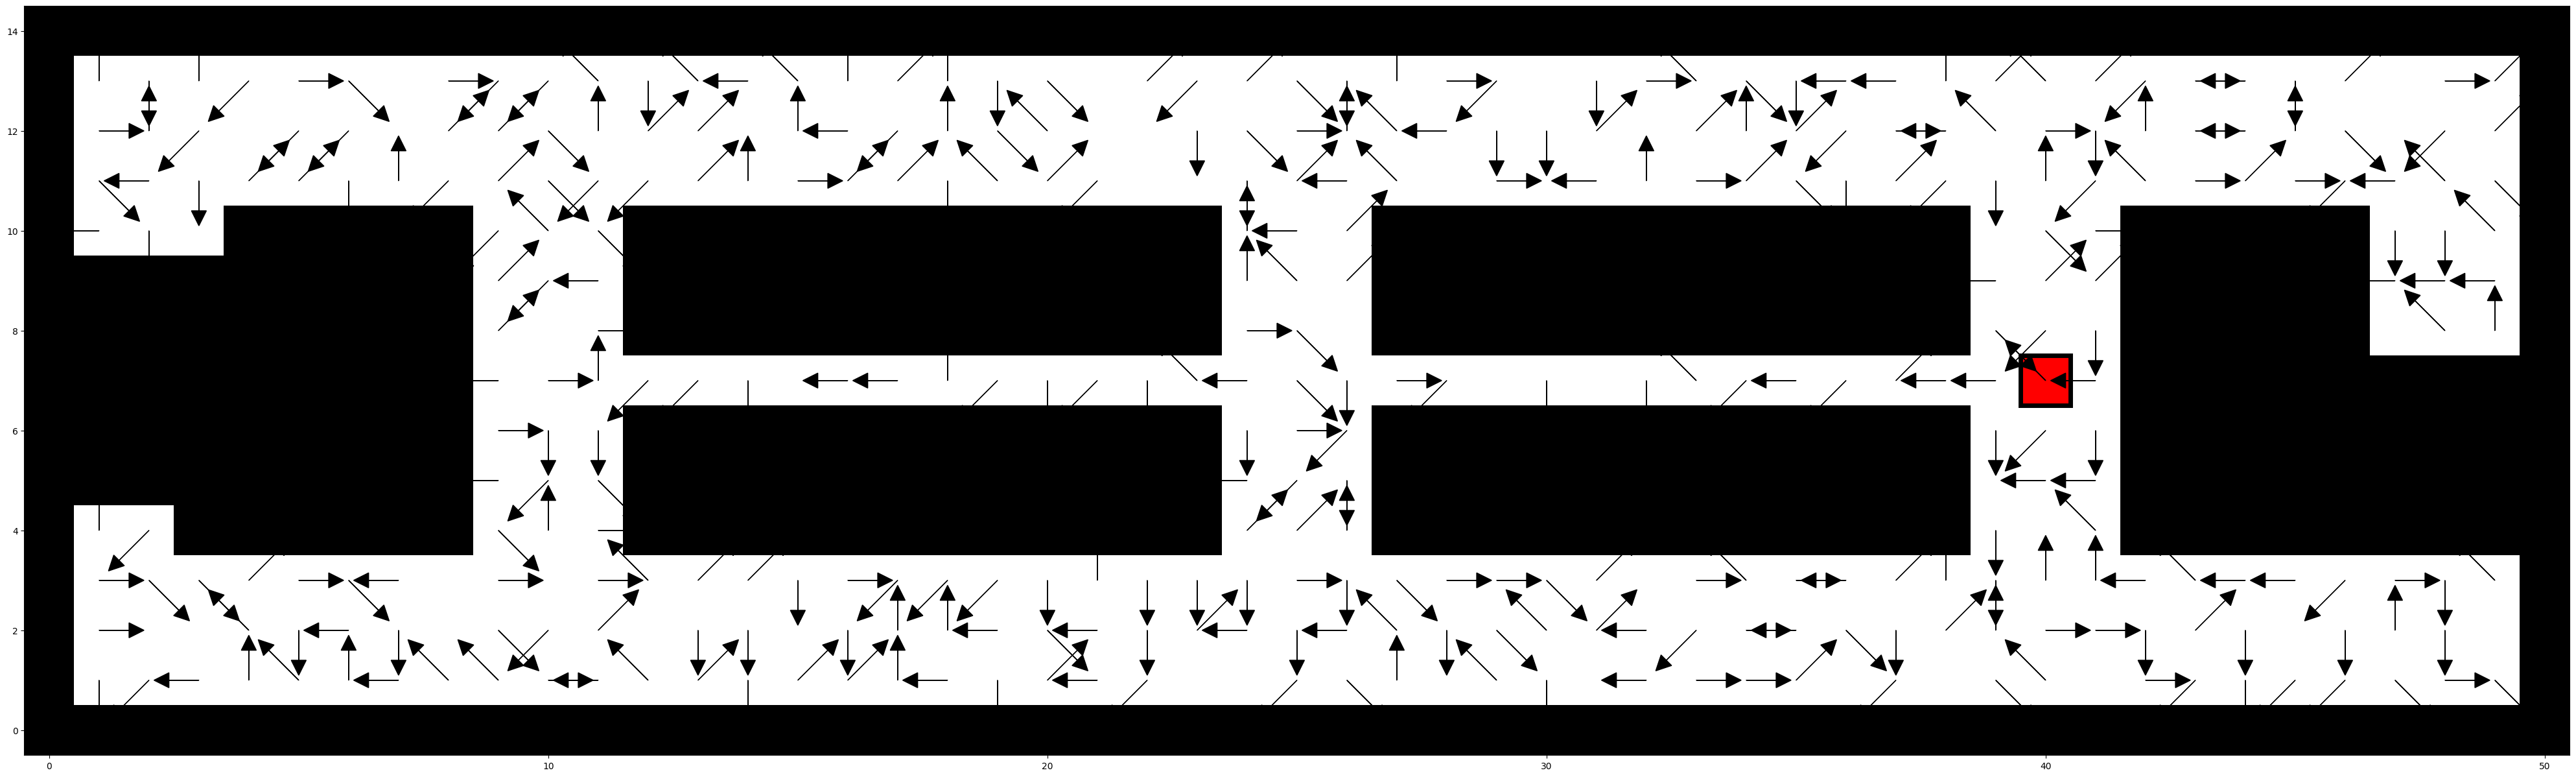

In [50]:
politica_procesable = [acciones[i] for i in politica.values()]

visualiza_politica(politica_procesable,mapa,destino,estados)

In [45]:
import sarsa as sarsa

modelo_sarsa = sarsa.SARSA(
    nav_transiciones_sistema,
    nav_recompensas_sistema,
    max_iteraciones=50000
)

modelo_sarsa.recompensas[153][8]


-30.265491900843113

In [46]:
modelo_sarsa.entrenar()

{0: {0: -200.00000376937544,
  1: -1106.9213028899735,
  2: -1131.2398669961453,
  3: -1294.0126820772334,
  4: -1144.41610188749,
  5: -1396.9192253774333,
  6: -1120.830617256297,
  7: -1102.7279179764944,
  8: -1102.143414475335},
 1: {0: -267.6305093416231,
  1: -1102.789327735647,
  2: -1130.5689909644368,
  3: -1103.685967339556,
  4: -1100.4715994874205,
  5: -1103.0851564334657,
  6: -1104.6601740663268,
  7: -1103.2161024500733,
  8: -1140.8243570043132},
 2: {0: -201.26317332355137,
  1: -1345.2340205167,
  2: -1149.47919709053,
  3: -1156.686959571268,
  4: -1141.5302370191241,
  5: -1122.4816019078596,
  6: -1113.8017754476214,
  7: -1167.86498280878,
  8: -1387.5146725097568},
 3: {0: -269.59312695291237,
  1: -1129.5329242724783,
  2: -1110.2073135471385,
  3: -1101.7820440165824,
  4: -1162.1596130148478,
  5: -1111.7132239081893,
  6: -1100.2348368293797,
  7: -1572.9051125544133,
  8: -1101.2602751669945},
 4: {0: -200.00000000000037,
  1: -1545.9796316229895,
  2: -11

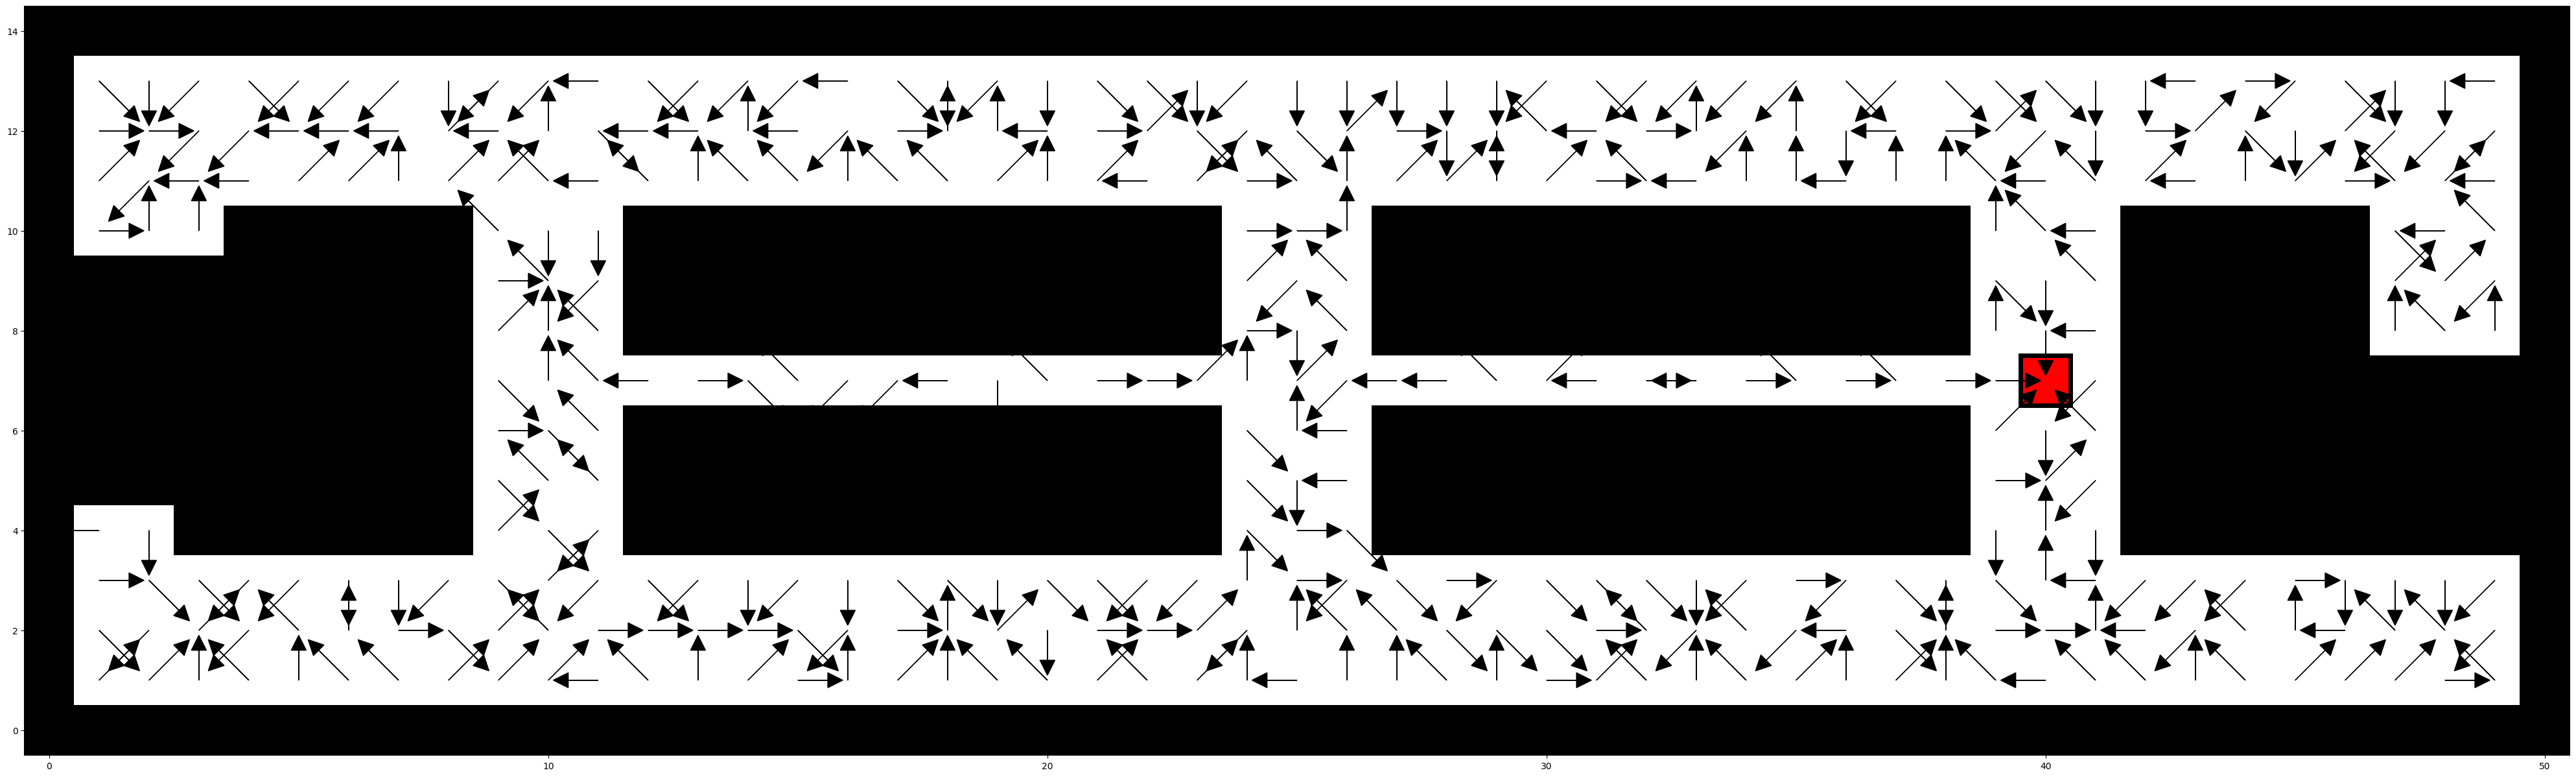

In [47]:
politica_sarsa = modelo_sarsa.obtener_politica()

politica_sarsa

# me quiero quedar con los valores asociados a cada clave y aplicarle acciones[i] para obtener la accion

politica_sarsa.values()

politica_sarsa_procesable = [acciones[i] for i in politica_sarsa.values()]

visualiza_politica(politica_sarsa_procesable,mapa,destino,estados)